In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


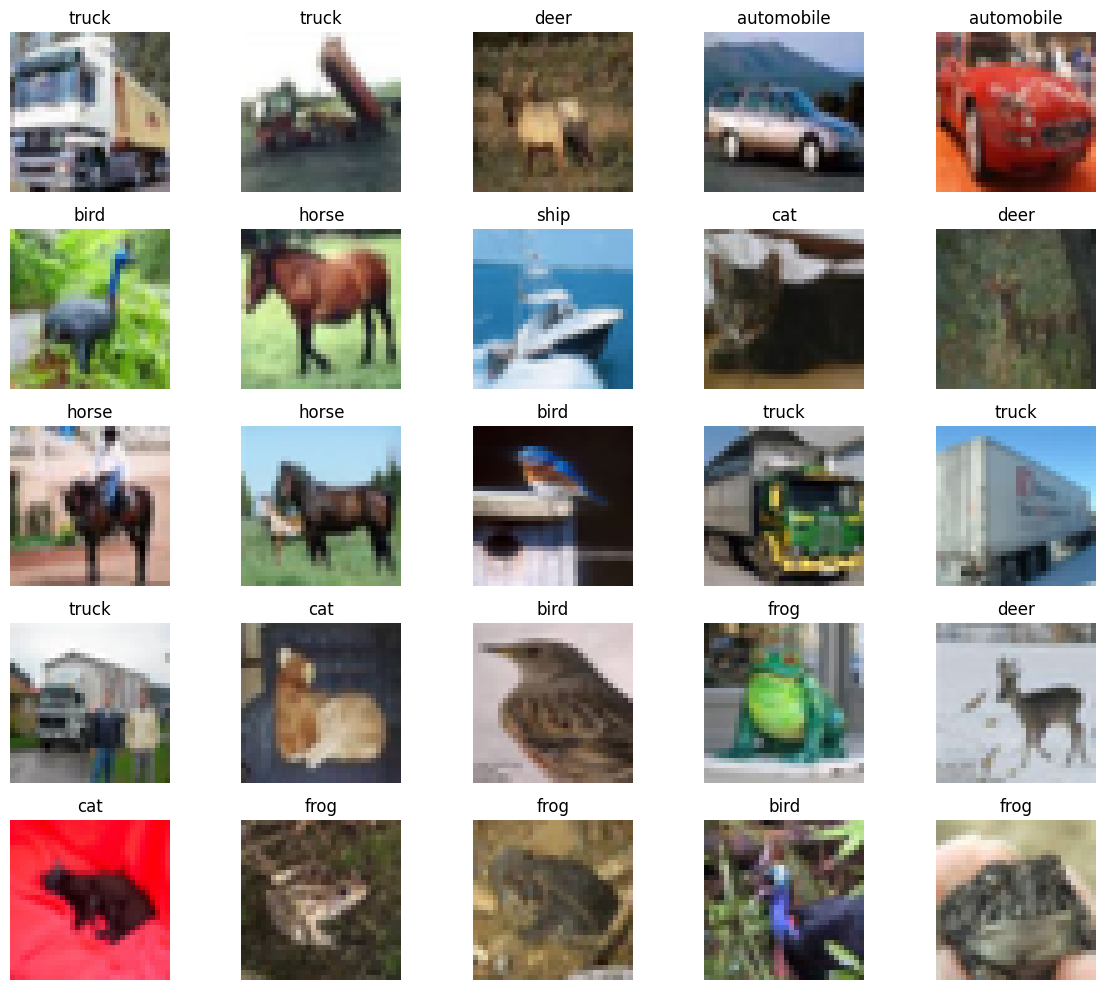

In [5]:
visualize_images(sample,(5,5))

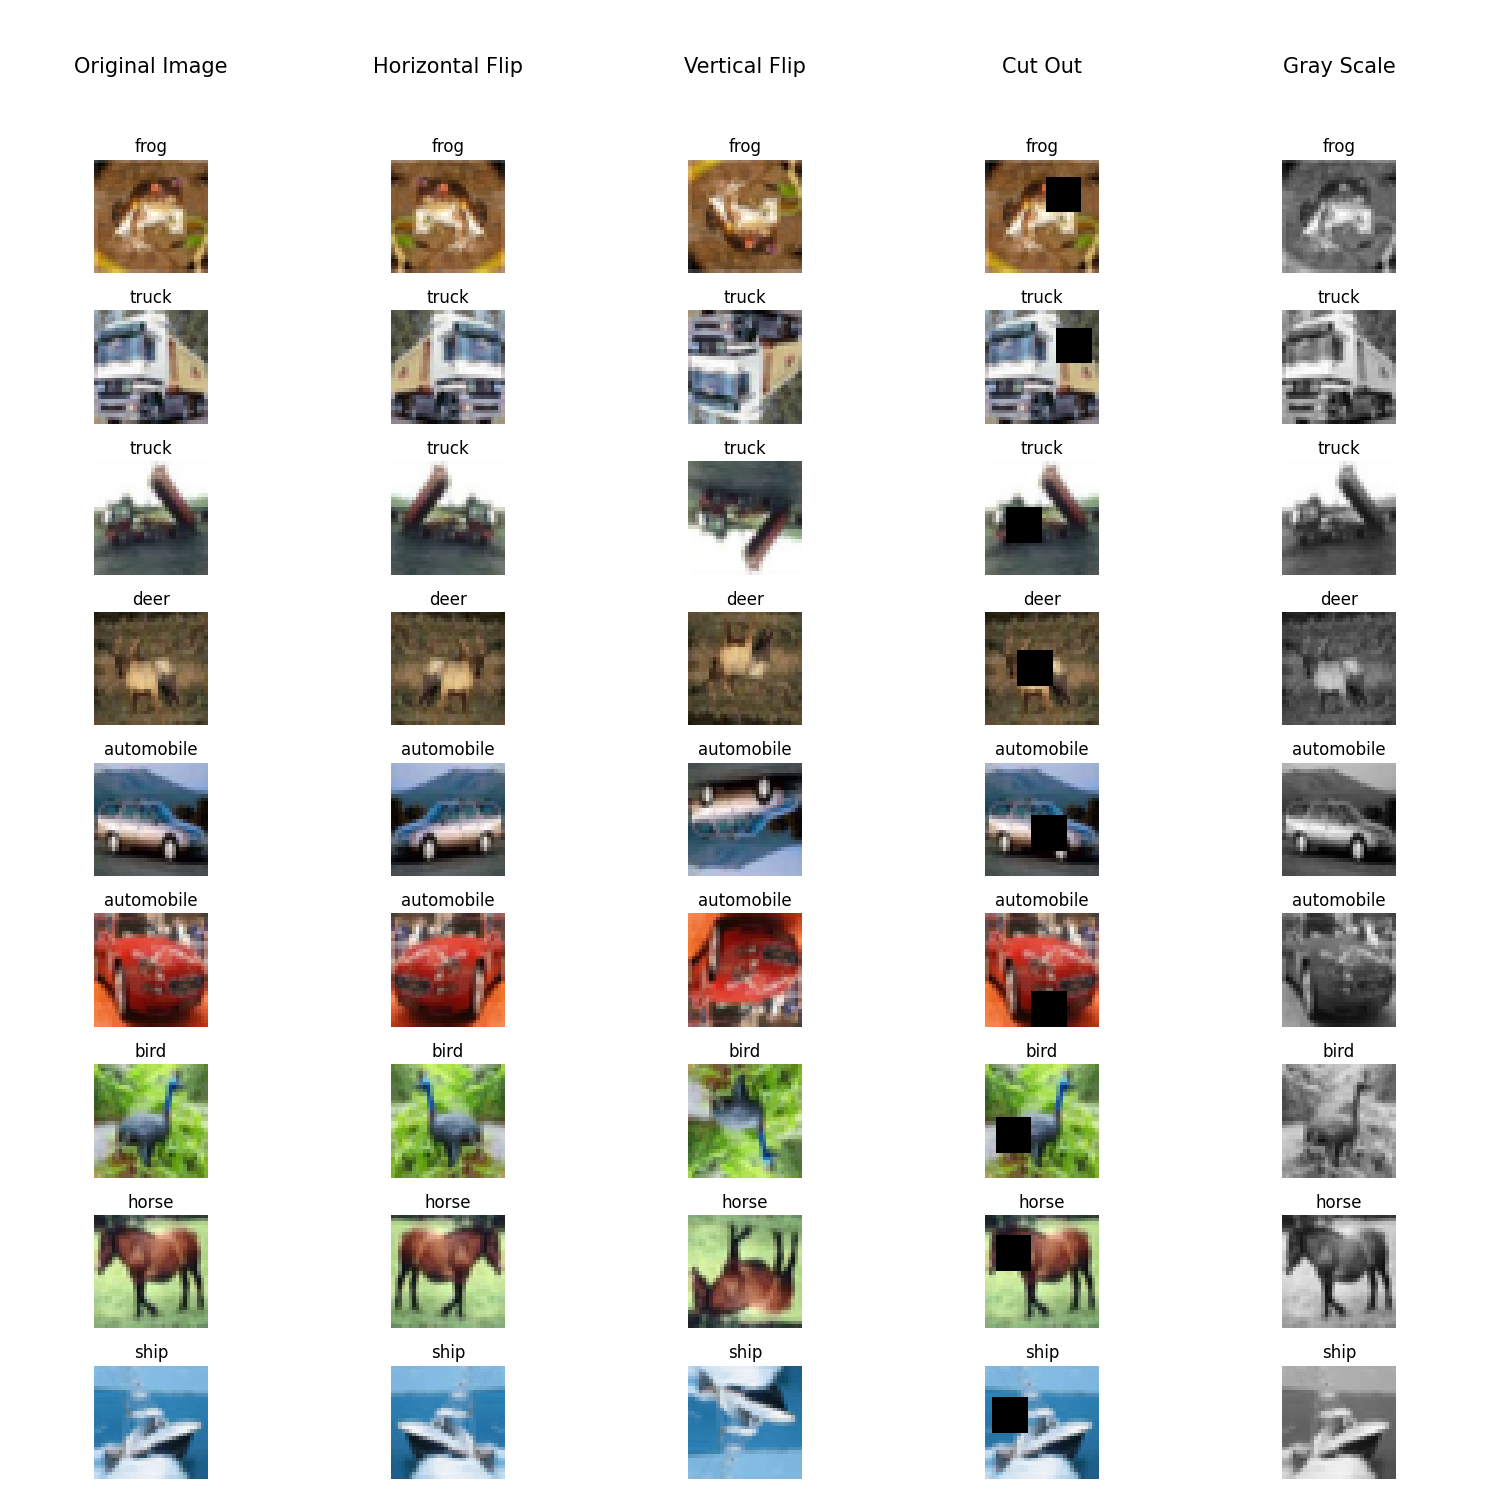

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="gn").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
         GroupNorm-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
         GroupNorm-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
        GroupNorm-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 20,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "step_size":3,
                       "gamma":0.2,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.7432 Batch_id=1562 Accuracy=28.23: 100%|██████████| 1563/1563 [00:29<00:00, 53.81it/s]


Test set: Average loss: 1.6400, Accuracy: 4015/10000 (40.15%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 2


Train: Loss=1.3726 Batch_id=1562 Accuracy=40.00: 100%|██████████| 1563/1563 [00:28<00:00, 54.50it/s]


Test set: Average loss: 1.3661, Accuracy: 5179/10000 (51.79%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 3


Train: Loss=1.3439 Batch_id=1562 Accuracy=45.26: 100%|██████████| 1563/1563 [00:28<00:00, 54.83it/s]


Test set: Average loss: 1.2594, Accuracy: 5572/10000 (55.72%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 4


Train: Loss=1.2653 Batch_id=1562 Accuracy=48.98: 100%|██████████| 1563/1563 [00:28<00:00, 53.95it/s]


Test set: Average loss: 1.1526, Accuracy: 5901/10000 (59.01%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 5


Train: Loss=1.8992 Batch_id=1562 Accuracy=51.25: 100%|██████████| 1563/1563 [00:28<00:00, 54.25it/s]


Test set: Average loss: 1.0959, Accuracy: 6175/10000 (61.75%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 6


Train: Loss=1.4577 Batch_id=1562 Accuracy=53.16: 100%|██████████| 1563/1563 [00:29<00:00, 53.39it/s]


Test set: Average loss: 1.0396, Accuracy: 6354/10000 (63.54%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 7


Train: Loss=1.0895 Batch_id=1562 Accuracy=54.65: 100%|██████████| 1563/1563 [00:28<00:00, 53.95it/s]


Test set: Average loss: 0.9800, Accuracy: 6605/10000 (66.05%)

Adjusting learning rate of group 0 to 6.0002e-04.
Epoch 8


Train: Loss=1.2934 Batch_id=1562 Accuracy=56.17: 100%|██████████| 1563/1563 [00:29<00:00, 52.58it/s]


Test set: Average loss: 0.9899, Accuracy: 6521/10000 (65.21%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 9


Train: Loss=1.0683 Batch_id=1562 Accuracy=56.89: 100%|██████████| 1563/1563 [00:29<00:00, 53.14it/s]


Test set: Average loss: 0.9412, Accuracy: 6709/10000 (67.09%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 10


Train: Loss=1.8597 Batch_id=1562 Accuracy=57.79: 100%|██████████| 1563/1563 [00:30<00:00, 50.75it/s]


Test set: Average loss: 0.9492, Accuracy: 6730/10000 (67.30%)

Adjusting learning rate of group 0 to 6.0004e-04.
Epoch 11


Train: Loss=1.4001 Batch_id=1562 Accuracy=58.43: 100%|██████████| 1563/1563 [00:28<00:00, 54.92it/s]


Test set: Average loss: 0.9429, Accuracy: 6712/10000 (67.12%)

Adjusting learning rate of group 0 to 6.0005e-04.
Epoch 12


Train: Loss=0.8358 Batch_id=1562 Accuracy=59.12: 100%|██████████| 1563/1563 [00:28<00:00, 55.28it/s]


Test set: Average loss: 0.9206, Accuracy: 6753/10000 (67.53%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 13


Train: Loss=1.0683 Batch_id=1562 Accuracy=59.56: 100%|██████████| 1563/1563 [00:28<00:00, 55.46it/s]


Test set: Average loss: 0.8748, Accuracy: 6974/10000 (69.74%)

Adjusting learning rate of group 0 to 6.0007e-04.
Epoch 14


Train: Loss=1.1917 Batch_id=1562 Accuracy=60.37: 100%|██████████| 1563/1563 [00:28<00:00, 55.22it/s]


Test set: Average loss: 0.8872, Accuracy: 6943/10000 (69.43%)

Adjusting learning rate of group 0 to 6.0008e-04.
Epoch 15


Train: Loss=1.2772 Batch_id=1562 Accuracy=61.03: 100%|██████████| 1563/1563 [00:28<00:00, 55.01it/s]


Test set: Average loss: 0.8483, Accuracy: 7057/10000 (70.57%)

Adjusting learning rate of group 0 to 6.0009e-04.
Epoch 16


Train: Loss=0.7909 Batch_id=1562 Accuracy=61.10: 100%|██████████| 1563/1563 [00:28<00:00, 54.86it/s]


Test set: Average loss: 0.8581, Accuracy: 7049/10000 (70.49%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 17


Train: Loss=0.9754 Batch_id=1562 Accuracy=61.49: 100%|██████████| 1563/1563 [00:28<00:00, 55.04it/s]


Test set: Average loss: 0.8381, Accuracy: 7104/10000 (71.04%)

Adjusting learning rate of group 0 to 6.0012e-04.
Epoch 18


Train: Loss=0.7350 Batch_id=1562 Accuracy=62.01: 100%|██████████| 1563/1563 [00:28<00:00, 55.39it/s]


Test set: Average loss: 0.8253, Accuracy: 7131/10000 (71.31%)

Adjusting learning rate of group 0 to 6.0013e-04.
Epoch 19


Train: Loss=1.3983 Batch_id=1562 Accuracy=62.31: 100%|██████████| 1563/1563 [00:28<00:00, 54.97it/s]


Test set: Average loss: 0.8192, Accuracy: 7133/10000 (71.33%)

Adjusting learning rate of group 0 to 6.0015e-04.
Epoch 20


Train: Loss=0.7391 Batch_id=1562 Accuracy=62.80: 100%|██████████| 1563/1563 [00:28<00:00, 55.77it/s]


Test set: Average loss: 0.8133, Accuracy: 7218/10000 (72.18%)

Adjusting learning rate of group 0 to 6.0016e-04.


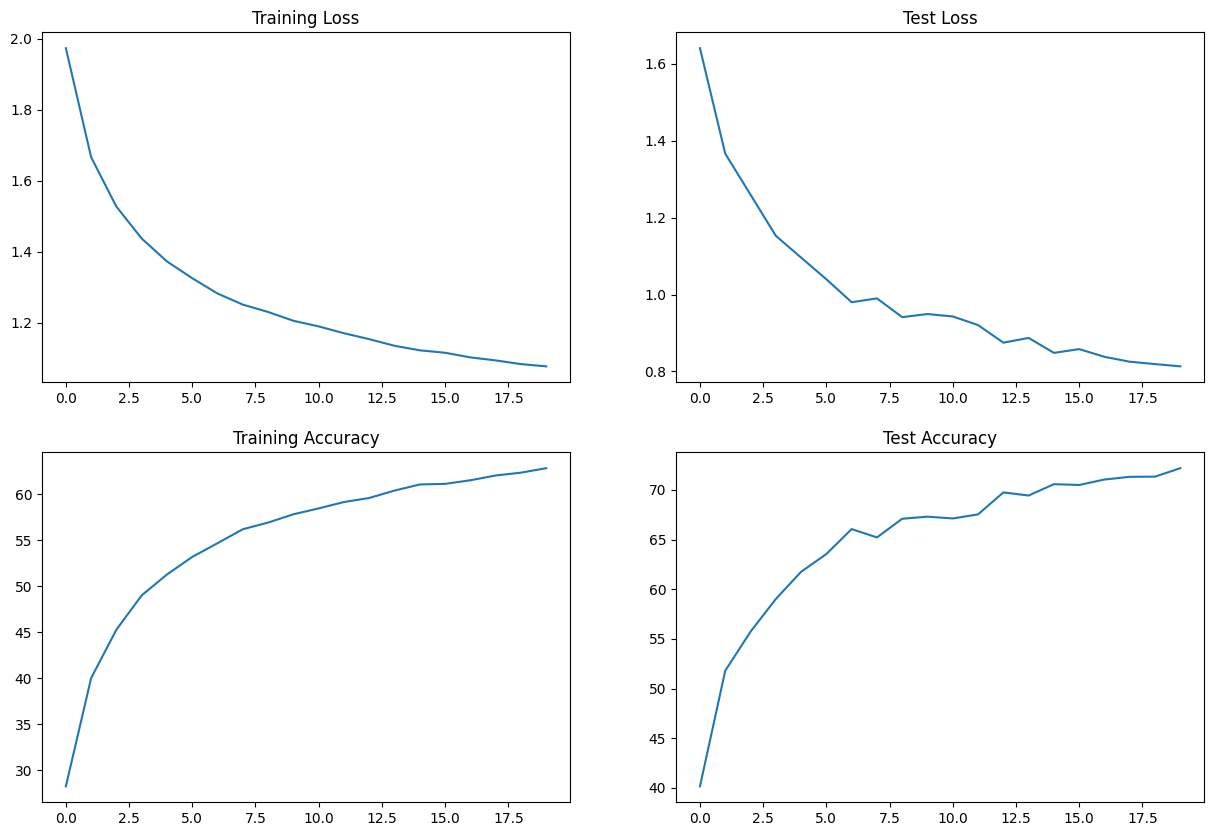

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

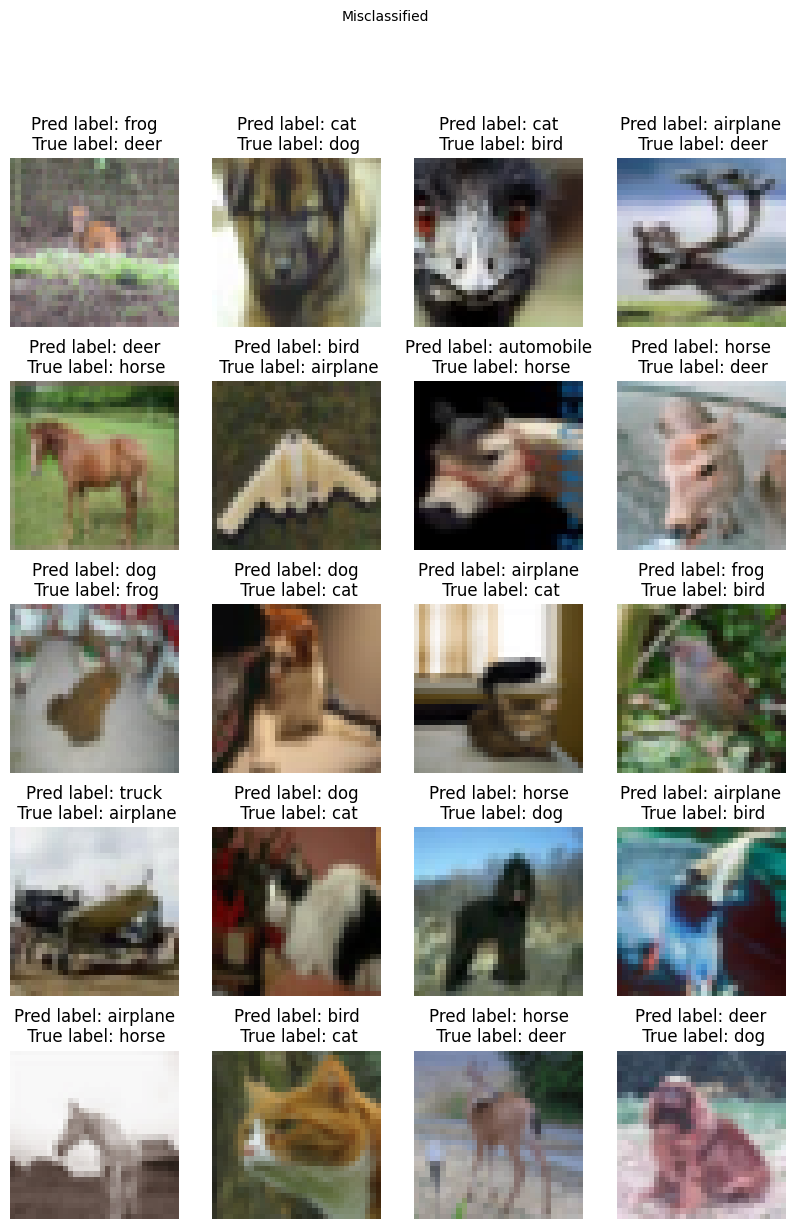

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 80 %

Accuracy of automobile : 92 %

Accuracy of  bird : 56 %

Accuracy of   cat : 50 %

Accuracy of  deer : 65 %

Accuracy of   dog : 57 %

Accuracy of  frog : 80 %

Accuracy of horse : 82 %

Accuracy of  ship : 84 %

Accuracy of truck : 81 %
{'airplane': 80.4635761589404, 'automobile': 92.64214046822742, 'bird': 56.25, 'cat': 50.324675324675326, 'deer': 65.10903426791278, 'dog': 57.18849840255591, 'frog': 80.26315789473684, 'horse': 82.37179487179488, 'ship': 84.12698412698413, 'truck': 81.875}


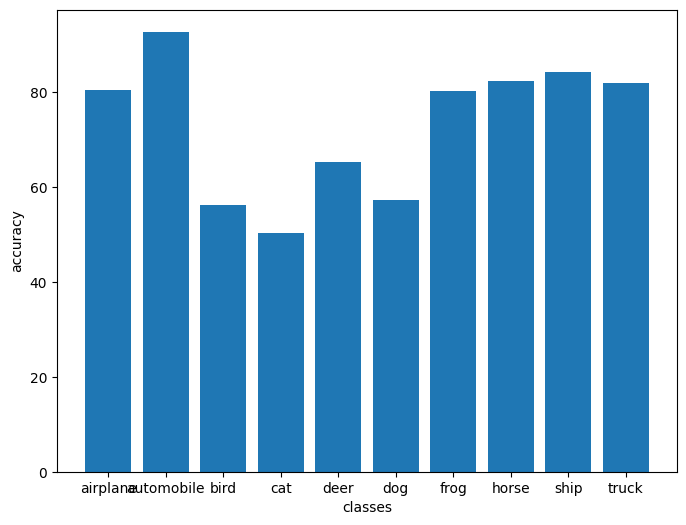

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)